# Trading Strategy

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
import os
import seaborn as sns
import random 
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn import ensemble

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
sns.set_theme()
sns.set_palette("tab20")
sns.set_style("darkgrid", rc = {"grid.color": "white"})
c10 = sns.color_palette("tab10").as_hex()[:]
c20 = sns.color_palette("tab20").as_hex()[:]

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
os.chdir('/Users/maris/Documents/FE800')

## Import Data

In [9]:
df_characteristics = pd.read_pickle("df_characteristics.pkl")
df_characteristics = df_characteristics.drop(["Notional", "Par", "Liquidity_Score"], axis = 1)
df_characteristics.head()

Name      Cusip   Maturity      TTM  Coupon  \
0  PFIZER INVESTMENT ENTERPRISES PTE  716973AG7 2053-05-19  29.5534    5.30   
1       ANHEUSER-BUSCH COMPANIES LLC  03522AAJ9 2046-02-01  22.2548    4.90   
2        GOLDMAN SACHS GROUP INC/THE  38141GFD1 2037-10-01  13.9123    6.75   
3                    CVS HEALTH CORP  126650CZ1 2048-03-25  24.4000    5.05   
4                   T-MOBILE USA INC  87264ABF1 2030-04-15   6.4438    3.88   

   Weight  Amount_Issued               Industry       Location Accrual_Date  \
0    0.30     6000000000  Consumer Non-Cyclical  United States   2023-05-19   
1    0.28     9518964000  Consumer Non-Cyclical        Belgium   2019-02-01   
2    0.25     5545000000                Banking  United States   2007-10-03   
3    0.22     8000000000  Consumer Non-Cyclical  United States   2018-03-09   
4    0.21     7000000000         Communications  United States   2021-04-15   

  Effective_Date Moody_Rating S&P_Rating Fitch_Rating    TTM_Range      TFI  \
0     2023-05-19           A1         A+            A    20+ Years   0.4685   
1     2019-05-13           A3         A-         None    20+ Years   4.4877   
2     2007-10-03         Baa2        BBB         BBB+  10-15 Years  16.1041   
3     2018-03-09         Baa2        BBB         None    20+ Years   5.6658   
4     2021-05-21         Baa2        BBB         BBB+    5-7 Years   2.4630   

          Company Ticker            Sector Sector Ticker  
0          Pfizer    PFE       Health Care           XLF  
1  Anheuser-Busch    BUD  Consumer Staples           XLV  
2   Goldman Sachs     GS        Financials           XLK  
3      Cvs Health    CVS       Health Care           XLF  
4    T-Mobile Usa   TMUS    Communications           XLY

In [10]:
df = pd.read_pickle("fe800_data.pkl")
df.head()

Price    Volume  Trades    Return       Age        TTM  \
cusip     trd_dt                                                                
00206RBH4 2018-07-02  86.132 -0.175980    13.0  0.000000  5.041096  24.471233   
          2018-07-03  86.821 -0.785507     7.0  0.007999  5.043836  24.468493   
          2018-07-05  86.730 -0.573559    24.0 -0.001048  5.049315  24.463014   
          2018-07-06  88.675 -0.637707    11.0  0.022426  5.052055  24.460274   
          2018-07-09  89.397 -0.115591     7.0  0.008142  5.060274  24.452055   

                      Stock_Return  Stock_Volume  ETF_Return        PV  \
cusip     trd_dt                                                         
00206RBH4 2018-07-02      0.000000      0.043275    0.000000       NaN   
          2018-07-03      0.015523     -0.171355   -0.005025  0.004849   
          2018-07-05     -0.003363     -0.086349    0.004959  0.001749   
          2018-07-06      0.002454      0.232636    0.007858  0.001668   
          2018-07-09      0.004123      0.357721    0.011967 -0.002931   

                           YTM   Duration      DV01   Convexity RunningCoupon  \
cusip     trd_dt                                                                
00206RBH4 2018-07-02  0.054010  16.324665 -1.406076  339.273017          0.05   
          2018-07-03  0.053445  16.343155 -1.418929  339.790490          0.05   
          2018-07-05  0.053541  16.344714 -1.417577  339.812463          0.05   
          2018-07-06  0.051959  16.349071 -1.449754  339.925850          0.05   
          2018-07-09  0.051410  16.326755 -1.459563  339.254704          0.05   

                     ParSpread CDSRealRecovery UpfrontBASpreadAverage  \
cusip     trd_dt                                                        
00206RBH4 2018-07-02  0.001845             0.4               0.009223   
          2018-07-03  0.001806             0.4               0.007907   
          2018-07-05  0.001819             0.4               0.009406   
          2018-07-06  0.001791             0.4               0.007758   
          2018-07-09  0.001794             0.4               0.008997   

                     ConvBASpreadAverage EstimatedNotional WklyNetNotional  \
cusip     trd_dt                                                             
00206RBH4 2018-07-02            0.001272         5000000.0    1173280837.0   
          2018-07-03            0.001092         5000000.0    1173280837.0   
          2018-07-05            0.001299         5000000.0    1152963454.0   
          2018-07-06            0.001073         5000000.0    1152963454.0   
          2018-07-09            0.001243         5000000.0    1152963454.0   

                            DP   AA    A  BBB   BB    B  CCC  
cusip     trd_dt                                              
00206RBH4 2018-07-02  0.142142  0.0  0.0  1.0  0.0  0.0  0.0  
          2018-07-03  0.142425  0.0  0.0  1.0  0.0  0.0  0.0  
          2018-07-05  0.142928  0.0  0.0  1.0  0.0  0.0  0.0  
          2018-07-06  0.143275  0.0  0.0  1.0  0.0  0.0  0.0  
          2018-07-09  0.141889  0.0  0.0  1.0  0.0  0.0  0.0

In [11]:
df.shape

(938979, 28)

In [12]:
df["Date"] = df.index.droplevel(0)
months = list(df.groupby([df.index.get_level_values("cusip"), 
                 df.index.get_level_values("trd_dt").year, 
                 df.index.get_level_values("trd_dt").month]).first()["Date"].unique())
len(months)

60

In [13]:
df_monthly = df[df.index.droplevel(0).isin(months)].drop(["Date"], axis = 1)
df_monthly.head()

Price    Volume  Trades    Return       Age  \
cusip     trd_dt                                                        
00206RBH4 2018-07-02  86.132000 -0.175980    13.0  0.000000  5.041096   
          2018-08-01  86.355000  0.847809    18.0 -0.006774  5.123288   
          2018-09-04  85.375000 -0.601991    18.0 -0.007389  5.216438   
          2018-10-01  86.040000 -0.685407    12.0 -0.008632  5.290411   
          2018-11-01  83.010164 -0.202297    18.0  0.012319  5.375342   

                            TTM  Stock_Return  Stock_Volume  ETF_Return  \
cusip     trd_dt                                                          
00206RBH4 2018-07-02  24.471233      0.000000      0.043275    0.000000   
          2018-08-01  24.389041     -0.002189     -0.310778   -0.004943   
          2018-09-04  24.295890     -0.002505     -0.652902    0.001881   
          2018-10-01  24.221918     -0.002680     -0.798964   -0.003071   
          2018-11-01  24.136986     -0.006193     -0.088531    0.020402   

                            PV       YTM   Duration      DV01   Convexity  \
cusip     trd_dt                                                            
00206RBH4 2018-07-02       NaN  0.054010  16.324665 -1.406076  339.273017   
          2018-08-01 -0.007722  0.054137  16.143330 -1.394057  333.781094   
          2018-09-04 -0.007465  0.055336  16.092766 -1.373920  331.983211   
          2018-10-01 -0.007425  0.055057  15.898062 -1.367869  326.223515   
          2018-11-01  0.001611  0.058094  15.713340 -1.304367  320.754884   

                     RunningCoupon ParSpread CDSRealRecovery  \
cusip     trd_dt                                               
00206RBH4 2018-07-02          0.05  0.001845             0.4   
          2018-08-01          0.05  0.001667             0.4   
          2018-09-04          0.05  0.001651             0.4   
          2018-10-01          0.05  0.001622             0.4   
          2018-11-01          0.05  0.001929             0.4   

                     UpfrontBASpreadAverage ConvBASpreadAverage  \
cusip     trd_dt                                                  
00206RBH4 2018-07-02               0.009223            0.001272   
          2018-08-01               0.007552            0.001047   
          2018-09-04               0.008806            0.001231   
          2018-10-01               0.008843            0.001168   
          2018-11-01               0.010184            0.001395   

                     EstimatedNotional WklyNetNotional        DP   AA    A  \
cusip     trd_dt                                                             
00206RBH4 2018-07-02         5000000.0    1173280837.0  0.142142  0.0  0.0   
          2018-08-01         5000000.0    1334950959.0  0.130953  0.0  0.0   
          2018-09-04         5000000.0    1355929605.0  0.125644  0.0  0.0   
          2018-10-01         5000000.0    1443783681.0   0.13366  0.0  0.0   
          2018-11-01         5000000.0    1529213994.0  0.154963  0.0  0.0   

                      BBB   BB    B  CCC  
cusip     trd_dt                          
00206RBH4 2018-07-02  1.0  0.0  0.0  0.0  
          2018-08-01  1.0  0.0  0.0  0.0  
          2018-09-04  1.0  0.0  0.0  0.0  
          2018-10-01  1.0  0.0  0.0  0.0  
          2018-11-01  1.0  0.0  0.0  0.0

In [14]:
len(df_monthly.index.droplevel(0).unique())

60

In [15]:
macro_factors = pd.read_pickle("macro_factors.pkl")
macro_factors_monthly = macro_factors[["EFFR", "SPY", "LQD"]].pct_change()
macro_factors_monthly = macro_factors_monthly[macro_factors_monthly.index.isin(months)]
macro_factors_monthly.head()

EFFR       SPY       LQD
2018-07-02       NaN       NaN       NaN
2018-08-01  0.000000 -0.001671 -0.006479
2018-09-04  0.005236 -0.001722 -0.004851
2018-10-01  0.000000  0.003474 -0.004438
2018-11-01  0.000000  0.010642 -0.000267

In [16]:
treasuries = pd.read_pickle("macro_factors.pkl")[["1YRT","2YRT","3YRT","5YRT","7YRT","10YRT","30YRT"]]
treasuries_monthly = treasuries[treasuries.index.isin(months)]
treasuries.columns = [1, 2, 3, 5, 7, 10, 30]
treasuries.head()

1     2     3     5     7     10    30
2018-07-02  2.34  2.57  2.65  2.75  2.83  2.87  2.99
2018-07-03  2.33  2.53  2.63  2.72  2.79  2.83  2.96
2018-07-05  2.32  2.55  2.65  2.74  2.80  2.84  2.95
2018-07-06  2.34  2.53  2.64  2.71  2.78  2.82  2.94
2018-07-09  2.34  2.57  2.66  2.75  2.82  2.86  2.96

In [17]:
daily_prices = df[["Price"]].unstack("cusip").loc[pd.Timestamp("2022-07-01"):]
daily_prices.columns = daily_prices.columns.droplevel(0)
daily_prices.head()

cusip       00206RBH4  00206RBK7  00206RCP5  00206RCQ3  00206RCU4  00206RDJ8  \
trd_dt                                                                         
2022-07-01     87.700     88.095     95.767     94.042    107.156     89.848   
2022-07-05     88.382     88.375     95.820     94.444    107.156     89.926   
2022-07-06     87.926     87.483     96.064     94.773    107.156     89.926   
2022-07-07     88.042     86.986     95.929     94.249    107.156     89.926   
2022-07-08     88.112     87.139     95.979     93.832    108.187     89.926   

cusip       00206RDK5  00206RDQ2  00206RDR0  002824BF6  002824BG4  002824BH2  \
trd_dt                                                                         
2022-07-01     90.471    100.408    103.899    101.026    107.394    105.688   
2022-07-05     92.778    100.397    105.219    101.286    107.907    106.475   
2022-07-06     92.766    101.217    104.112    101.008    107.124    106.874   
2022-07-07     92.766    100.159    104.827    100.971    107.422    106.483   
2022-07-08     92.766     99.924    102.506    100.957    107.201    106.061   

cusip       00287YAM1  00287YAR0  00287YAS8  00287YAV1  00287YAW9  00440EAW7  \
trd_dt                                                                         
2022-07-01   91.90000     98.069   94.95500  95.103000    91.3530     94.630   
2022-07-05   90.71600     97.591   94.82600  95.632000    91.2400     95.399   
2022-07-06   90.71600     98.081   94.85500  96.543571    91.3024     94.871   
2022-07-07   91.73500     97.567   94.71679  94.791000    91.8880     94.871   
2022-07-08   91.62812     97.790   94.19600  94.391000    91.7180     94.871   

cusip       00774MAB1  00817YAF5  00817YAZ1  013716AU9  02209SAM5  02209SAR4  \
trd_dt                                                                         
2022-07-01     90.570    113.052   82.91500    115.546     73.378  85.289592   
2022-07-05     91.615    113.681   83.07522    115.361     73.017  86.554000   
2022-07-06     91.729    113.681   83.19400    114.841     71.997  84.271000   
2022-07-07     90.860    113.285   83.00200    114.841     72.468  85.136000   
2022-07-08     90.527    113.285   82.76600    113.516     72.761  84.637000   

cusip       02209SAV5   023135AP1  023135AQ9  023135BC9  023135BF2  023135BJ4  \
trd_dt                                                                          
2022-07-01     68.020  106.960000  105.43600     98.100     95.606     94.951   
2022-07-05     68.749  106.823000  106.36200     98.569     96.283     95.843   
2022-07-06     68.490  106.579000  105.53500     97.855     97.151     95.475   
2022-07-07     67.401  105.180188  105.77485     97.807     95.887     95.572   
2022-07-08     67.814  105.513000  106.88700     97.817     96.494     94.563   

cusip       023135BM7  025816BF5  026874DF1  026874DL8  03027XAK6  03027XAP5  \
trd_dt                                                                         
2022-07-01     94.694     91.129     93.940     94.508     95.428     96.023   
2022-07-05     95.631     92.404     93.510     94.706     95.457     94.911   
2022-07-06     94.793     91.422     93.096     93.321     95.299     94.981   
2022-07-07     95.300     91.321     92.386     93.864     95.457     94.717   
2022-07-08     95.806     92.117     92.386     93.864     96.238     94.320   

cusip       03040WAD7  03040WAR6  03073EAP0  031162BZ2  031162CD0  031162CF5  \
trd_dt                                                                         
2022-07-01    116.623     83.777     96.372     90.417     93.044     94.433   
2022-07-05    116.934     84.846     97.315     92.562     93.044     95.415   
2022-07-06    116.934     84.201     96.599     92.062     93.628     94.769   
2022-07-07    116.934     83.630     96.457     91.047     93.417     95.092   
2022-07-08    116.934     83.630     96.515     90.822     93.417     94.901   

cusip       031162CQ1  032654AN5  03523TBF4  03523TBT4  035240AG5 

# Price Predictions

In [18]:
def closest_treasury(ttm):
    treasuries = [1, 2, 3, 5, 7, 10, 30]
    return min(treasuries, key = lambda x : abs(x - ttm))

In [19]:
def get_data(cusip):

    df = df_monthly.loc[cusip]
    df["TreasuryYield"] = df.apply(lambda x: treasuries[closest_treasury(x["TTM"])].loc[x.name], axis = 1)
    df = pd.concat([df, macro_factors_monthly], axis = 1)
    return df.iloc[1:]

## Linear Regression

In [20]:
def OLS(df, feature):

    X = df.drop([feature, "Price"], axis = 1)[1:].dropna(how = "all", axis = 1).fillna(0)
    Y = df[feature][1:].fillna(0)

    X_train = X.loc[:pd.Timestamp("2022-06-01")]
    X_test = X.loc[pd.Timestamp("2022-07-01"):]
    Y_train = Y.loc[:pd.Timestamp("2022-06-01")]
    Y_test = Y.loc[pd.Timestamp("2022-07-01"):]

    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    X0 = sm.add_constant(X)
    model_output = sm.OLS(Y, X0).fit()

    r2_train = model.score(X_train, Y_train)
    r2_test = r2_score(Y_test, Y_pred)

    prices = pd.DataFrame({"Test": df["Price"].loc[pd.Timestamp("2022-07-01"):]}).ffill()
    prices["Return Pred"] = Y_pred + 1

    pred = []
    for i in range(len(prices)):
        if i == 0:
            pred.append(prices["Return Pred"].iloc[0] * df["Price"].loc[pd.Timestamp("2022-06-01")])
        else:
            pred.append(prices["Return Pred"].iloc[i] * prices["Test"].iloc[i - 1])
    prices["Pred"] = pred
    prices["Pred"] = prices["Pred"].ffill()

    return prices[["Test", "Pred"]]

In [21]:
%%time

price_predictions_OLS = []
for col in list(df_monthly.index.droplevel(1).unique()):
    df1 = OLS(get_data(col), "Return")
    df1.columns =  pd.MultiIndex.from_tuples([(col, "Actual"), (col, "Pred")], names=['cusip', 'type'])
    price_predictions_OLS.append(df1)

CPU times: user 4.54 s, sys: 63.3 ms, total: 4.6 s
Wall time: 4.6 s


In [22]:
predictions_OLS = pd.concat(price_predictions_OLS, axis = 1)
predictions_OLS.index.name = "trd_dt"
predictions_OLS.head()

cusip      00206RBH4            00206RBK7            00206RCP5              \
type          Actual       Pred    Actual       Pred    Actual        Pred   
trd_dt                                                                       
2022-07-01  87.70000  95.855562    88.095  93.120841    95.767  100.762702   
2022-08-01  92.89600  88.621049    92.714  87.782611   100.142   95.676780   
2022-09-01  84.73800  93.292617    85.380  92.538686    92.751   99.463915   
2022-10-03  80.98000  88.597599    80.452  91.547788    88.498   94.280136   
2022-11-01  78.03035  85.411973    76.931  84.249847    86.375   89.176065   

cusip      00206RCQ3            00206RCU4             00206RDJ8             \
type          Actual       Pred    Actual        Pred    Actual       Pred   
trd_dt                                                                       
2022-07-01  94.04200  99.586690   107.156  116.391992    89.848  94.959209   
2022-08-01  98.86800  93.378826   111.815  107.338742    95.676  89.121265   
2022-09-01  90.94300  98.595891   102.107  113.699360    86.045  96.299247   
2022-10-03  85.54171  97.455568    95.491  111.565736    82.074  90.740379   
2022-11-01  82.13700  90.411860    92.601  103.293994    78.172  85.189843   

cusip      00206RDK5            00206RDQ2              00206RDR0              \
type          Actual       Pred    Actual        Pred     Actual        Pred   
trd_dt                                                                         
2022-07-01  90.47100  98.280121   100.408  102.781245  103.89900  108.383306   
2022-08-01  95.33614  91.555721   102.275  101.064370  107.44246  104.553891   
2022-09-01  89.26500  94.351566    98.594  102.053607  101.19930  107.714255   
2022-10-03  80.41700  92.929381    97.192   99.703459   95.40300  104.831897   
2022-11-01  77.56000  83.932636    95.452   97.244084   94.67946   97.109309   

cusip      002824BF6             002824BG4             002824BH2              \
type          Actual        Pred    Actual        Pred    Actual        Pred   
trd_dt                                                                         
2022-07-01   101.026  102.180476   107.394  109.713442   105.688  111.829057   
2022-08-01   102.866  101.132998   113.439  107.694926   112.464  107.126514   
2022-09-01   100.000  102.746148   104.126  111.345864   103.959  112.588126   
2022-10-03    97.690   99.351345    99.898  103.165449    97.877  106.923133   
2022-11-01    96.680   97.296259    96.196   96.909884    94.484   99.853257   

cusip      00287YAM1            00287YAR0              00287YAS8             \
type          Actual       Pred    Actual        Pred     Actual       Pred   
trd_dt                                                                        
2022-07-01    91.900  96.930827    98.069  103.577695   94.95500  99.344482   
2022-08-01    96.736  90.823541   102.534   98.697846  101.25578  95.769195   
2022-09-01    88.676  94.218197    94.217  104.348808   93.55100  99.623197   
2022-10-03    84.173  88.823826    91.055   98.937089   86.22400  92.672245   
2022-11-01    83.075  82.231094    88.995   95.058988   84.52600  85.284255   

cusip      00287YAV1            00287YAW9            00440EAW7              \
type          Actual       Pred    Actual       Pred    Actual        Pred   
trd_dt                                                                       
2022-07-01    95.103  97.060348    91.353  97.463218    94.630  101.718486   
2022-08-01   100.165  93.616341    96.784  90.393904   100.174   94.029903   
2022-09-01    91.671  98.786007    87.880  95.172329    92.666   98.039360   
2022-10-03    88.502  90.897033    85.168  89.494158    87.262   97.053252   
2022-11-01    86.709  85.527469    82.041  84.293432    82.207   90.334321   

cusip      00774MAB1            00817YAF5             00817YAZ1             \
type          Actual       Pred    Actual        Pred    Actual       Pred   
trd_dt                                                

In [23]:
def ridge_regression(df, feature):
    
    X = df.drop([feature, "Price"], axis=1)[1:].fillna(0)
    Y = df[feature][1:].fillna(0)

    X_train = X.loc[:pd.Timestamp("2022-06-01")]
    X_test = X.loc[pd.Timestamp("2022-07-01"):]
    Y_train = Y.loc[:pd.Timestamp("2022-06-01")]
    Y_test = Y.loc[pd.Timestamp("2022-07-01"):]

    ridge_model = RidgeCV(alphas=np.logspace(-6, 6, 13), cv=10).fit(X_train, Y_train)
    ridge_tuned = Ridge(alpha=ridge_model.alpha_).fit(X_train, Y_train)
    Y_pred = ridge_tuned.predict(X_test)

    r2_train = ridge_model.score(X_train, Y_train)
    r2_test = r2_score(Y_test, Y_pred)

    prices = pd.DataFrame({"Test": df["Price"].loc[pd.Timestamp("2022-07-01"):]}).ffill()
    prices["Return Pred"] = Y_pred + 1

    pred = []
    for i in range(len(prices)):
        if i == 0:
            pred.append(prices["Return Pred"].iloc[0] * df["Price"].loc[pd.Timestamp("2022-06-01")])
        else:
            pred.append(prices["Return Pred"].iloc[i] * prices["Test"].iloc[i - 1])
    prices["Pred"] = pred
    prices["Pred"] = prices["Pred"].ffill()

    return prices[["Test", "Pred"]]

In [24]:
%%time

price_predictions_ridge = []
for col in list(df_monthly.index.droplevel(1).unique()):
    df1 = ridge_regression(get_data(col), "Return")
    df1.columns =  pd.MultiIndex.from_tuples([(col, "Actual"), (col, "Pred")], names=['cusip', 'type'])
    price_predictions_ridge.append(df1)

CPU times: user 2min 18s, sys: 1.09 s, total: 2min 19s
Wall time: 2min 19s


In [25]:
predictions_ridge = pd.concat(price_predictions_ridge, axis = 1)
predictions_ridge.index.name = "trd_dt"
predictions_ridge.head()

cusip      00206RBH4            00206RBK7            00206RCP5              \
type          Actual       Pred    Actual       Pred    Actual        Pred   
trd_dt                                                                       
2022-07-01  87.70000  93.165586    88.095  93.051564    95.767  100.114726   
2022-08-01  92.89600  87.810002    92.714  88.365152   100.142   95.887639   
2022-09-01  84.73800  92.824255    85.380  92.790559    92.751  100.283196   
2022-10-03  80.98000  84.664829    80.452  85.521253    88.498   92.884616   
2022-11-01  78.03035  80.937157    76.931  80.649176    86.375   88.627437   

cusip      00206RCQ3            00206RCU4             00206RDJ8             \
type          Actual       Pred    Actual        Pred    Actual       Pred   
trd_dt                                                                       
2022-07-01  94.04200  97.711314   107.156  112.463434    89.848  96.136726   
2022-08-01  98.86800  93.350831   111.815  106.996002    95.676  90.172306   
2022-09-01  90.94300  96.971481   102.107  111.494104    86.045  95.907034   
2022-10-03  85.54171  88.960314    95.491  101.784942    82.074  86.231225   
2022-11-01  82.13700  83.387283    92.601   95.166079    78.172  82.313688   

cusip      00206RDK5            00206RDQ2              00206RDR0              \
type          Actual       Pred    Actual        Pred     Actual        Pred   
trd_dt                                                                         
2022-07-01  90.47100  95.039197   100.408  101.676545  103.89900  107.247853   
2022-08-01  95.33614  89.842790   102.275  100.557967  107.44246  103.945861   
2022-09-01  89.26500  93.956146    98.594  102.483669  101.19930  107.576572   
2022-10-03  80.41700  87.816951    97.192   98.806391   95.40300  101.341862   
2022-11-01  77.56000  78.950234    95.452   97.410513   94.67946   95.550808   

cusip      002824BF6             002824BG4             002824BH2              \
type          Actual        Pred    Actual        Pred    Actual        Pred   
trd_dt                                                                         
2022-07-01   101.026  102.135447   107.394  110.198282   105.688  111.803456   
2022-08-01   102.866  101.082240   113.439  107.709251   112.464  106.804579   
2022-09-01   100.000  102.923443   104.126  112.836907   103.959  112.725656   
2022-10-03    97.690  100.053558    99.898  103.799639    97.877  106.252734   
2022-11-01    96.680   97.738306    96.196   98.902874    94.484   99.075182   

cusip      00287YAM1            00287YAR0              00287YAS8              \
type          Actual       Pred    Actual        Pred     Actual        Pred   
trd_dt                                                                         
2022-07-01    91.900  95.475762    98.069  100.831662   94.95500   99.334001   
2022-08-01    96.736  91.744107   102.534   98.118905  101.25578   94.808260   
2022-09-01    88.676  96.554958    94.217  102.586122   93.55100  101.099446   
2022-10-03    84.173  88.496038    91.055   94.264878   86.22400   93.406747   
2022-11-01    83.075  83.979203    88.995   91.101259   84.52600   86.091227   

cusip      00287YAV1             00287YAW9            00440EAW7              \
type          Actual        Pred    Actual       Pred    Actual        Pred   
trd_dt                                                                        
2022-07-01    95.103   98.129550    91.353  98.029798    94.630   98.260620   
2022-08-01   100.165   95.194653    96.784  91.311284   100.174   94.536283   
2022-09-01    91.671  100.261388    87.880  96.235785    92.666  100.075228   
2022-10-03    88.502   91.759149    85.168  90.784470    87.262   92.574964   
2022-11-01    86.709   88.586930    82.041  85.765789    82.207   87.176586   

cusip      00774MAB1            00817YAF5             00817YAZ1             \
type          Actual       Pred    Actual        Pred    Actual       Pred   
trd_dt                                

## Present Value

In [26]:
df_characteristics["Coupon"] = df_characteristics["Coupon"]/100
df_characteristics.head()

Name      Cusip   Maturity      TTM  Coupon  \
0  PFIZER INVESTMENT ENTERPRISES PTE  716973AG7 2053-05-19  29.5534  0.0530   
1       ANHEUSER-BUSCH COMPANIES LLC  03522AAJ9 2046-02-01  22.2548  0.0490   
2        GOLDMAN SACHS GROUP INC/THE  38141GFD1 2037-10-01  13.9123  0.0675   
3                    CVS HEALTH CORP  126650CZ1 2048-03-25  24.4000  0.0505   
4                   T-MOBILE USA INC  87264ABF1 2030-04-15   6.4438  0.0388   

   Weight  Amount_Issued               Industry       Location Accrual_Date  \
0    0.30     6000000000  Consumer Non-Cyclical  United States   2023-05-19   
1    0.28     9518964000  Consumer Non-Cyclical        Belgium   2019-02-01   
2    0.25     5545000000                Banking  United States   2007-10-03   
3    0.22     8000000000  Consumer Non-Cyclical  United States   2018-03-09   
4    0.21     7000000000         Communications  United States   2021-04-15   

  Effective_Date Moody_Rating S&P_Rating Fitch_Rating    TTM_Range      TFI  \
0     2023-05-19           A1         A+            A    20+ Years   0.4685   
1     2019-05-13           A3         A-         None    20+ Years   4.4877   
2     2007-10-03         Baa2        BBB         BBB+  10-15 Years  16.1041   
3     2018-03-09         Baa2        BBB         None    20+ Years   5.6658   
4     2021-05-21         Baa2        BBB         BBB+    5-7 Years   2.4630   

          Company Ticker            Sector Sector Ticker  
0          Pfizer    PFE       Health Care           XLF  
1  Anheuser-Busch    BUD  Consumer Staples           XLV  
2   Goldman Sachs     GS        Financials           XLK  
3      Cvs Health    CVS       Health Care           XLF  
4    T-Mobile Usa   TMUS    Communications           XLY

In [27]:
df_info = df[["Price"]]
df_info = df_info[df_info.index.droplevel(0).isin(months)]

cpn, ttm = [], []
for i in df_info.index.droplevel(1).unique():
    cpn.extend([df_characteristics[df_characteristics["Cusip"] == i]["Coupon"].values[0]] * 60)
    ttm.extend(list((df_characteristics[df_characteristics["Cusip"] == i]["Maturity"].values[0] - df_info.index.droplevel(0).unique()).days / 365))

df_info["CPN"], df_info["TTM"] = list(cpn), list(ttm)
df_info.head()

Price    CPN        TTM
cusip     trd_dt                                 
00206RBH4 2018-07-02  86.132000  0.043  24.471233
          2018-08-01  86.355000  0.043  24.389041
          2018-09-04  85.375000  0.043  24.295890
          2018-10-01  86.040000  0.043  24.221918
          2018-11-01  83.010164  0.043  24.136986

In [28]:
def PV(ttm, c, date):

    periods = int(ttm * 2) + 1
    extra_time = ttm - int(ttm * 2)/2
    coupon = c/2
    r = (macro_factors[str(closest_treasury(ttm)) + "YRT"][date] + 2)/100

    df = pd.DataFrame()
    df["Time"] = [np.round((i/2) + extra_time, 4) for i in range(periods)]
    df = df[df["Time"] > 0]
    df["Cash Flow"] = coupon * 100
    df["Cash Flow"].iloc[-1] = coupon * 100 + 100
    df["PV"] = df["Cash Flow"] / ((1 + r) ** df["Time"])

    return sum(df["PV"])

In [29]:
def PV_Predictions(df):

    df = df[pd.Timestamp("2022-07-01"):]

    prices = pd.DataFrame({"Test": df["Price"].ffill()})
    prices["Pred"] = df.apply(lambda x: PV(x["TTM"], x["CPN"], x.name), axis = 1)

    return prices[["Test", "Pred"]]

In [30]:
%%time

price_predictions_PV = []
for col in list(df_monthly.index.droplevel(1).unique()):
    df1 = PV_Predictions(df_info.loc[col])
    df1.columns =  pd.MultiIndex.from_tuples([(col, "Actual"), (col, "Pred")], names=['cusip', 'type'])
    price_predictions_PV.append(df1)

CPU times: user 5.28 s, sys: 70.7 ms, total: 5.35 s
Wall time: 5.33 s


In [31]:
predictions_PV = pd.concat(price_predictions_PV, axis = 1)
predictions_PV.index.name = "trd_dt"
predictions_PV.head()

cusip      00206RBH4            00206RBK7            00206RCP5              \
type          Actual       Pred    Actual       Pred    Actual        Pred   
trd_dt                                                                       
2022-07-01  87.70000  90.664589    88.095  90.710547    95.767   97.475825   
2022-08-01  92.89600  93.279611    92.714  93.474452   100.142  100.454169   
2022-09-01  84.73800  88.505881    85.380  88.367304    92.751   94.914093   
2022-10-03  80.98000  85.075520    80.452  84.710966    88.498   91.904135   
2022-11-01  78.03035  81.367231    76.931  80.785396    86.375   89.121766   

cusip      00206RCQ3            00206RCU4             00206RDJ8             \
type          Actual       Pred    Actual        Pred    Actual       Pred   
trd_dt                                                                       
2022-07-01  94.04200  96.441571   107.156  110.464824    89.848  93.492867   
2022-08-01  98.86800  99.375838   111.815  113.731157    95.676  96.440434   
2022-09-01  90.94300  93.959252   102.107  104.916279    86.045  90.958812   
2022-10-03  85.54171  90.088989    95.491  100.633031    82.074  84.799019   
2022-11-01  82.13700  85.938664    92.601   96.040655    78.172  80.622908   

cusip      00206RDK5            00206RDQ2              00206RDR0              \
type          Actual       Pred    Actual        Pred     Actual        Pred   
trd_dt                                                                         
2022-07-01  90.47100  94.090309   100.408   99.037907  103.89900  106.156801   
2022-08-01  95.33614  97.099786   102.275  100.306491  107.44246  109.562699   
2022-09-01  89.26500  91.487709    98.594   95.777474  101.19930  103.168862   
2022-10-03  80.41700  85.216537    97.192   94.359494   95.40300   97.066189   
2022-11-01  77.56000  80.957644    95.452   93.490633   94.67946   93.864567   

cusip      002824BF6            002824BG4             002824BH2              \
type          Actual       Pred    Actual        Pred    Actual        Pred   
trd_dt                                                                        
2022-07-01   101.026  96.079293   107.394   99.600342   105.688   98.283525   
2022-08-01   102.866  97.284732   113.439  102.850573   112.464  101.293237   
2022-09-01   100.000  95.035218   104.126   96.724667   103.959   95.730193   
2022-10-03    97.690  93.725005    99.898   93.396906    97.877   91.758316   
2022-11-01    96.680  92.930299    96.196   90.333393    94.484   87.503404   

cusip      00287YAM1            00287YAR0              00287YAS8             \
type          Actual       Pred    Actual        Pred     Actual       Pred   
trd_dt                                                                        
2022-07-01    91.900  92.425303    98.069   97.488831   94.95500  95.866487   
2022-08-01    96.736  95.061673   102.534  100.466367  101.25578  98.730084   
2022-09-01    88.676  90.263309    94.217   94.927718   93.55100  93.463588   
2022-10-03    84.173  86.815541    91.055   91.917821   86.22400  89.694602   
2022-11-01    83.075  83.085968    88.995   89.136472   84.52600  85.643483   

cusip      00287YAV1            00287YAW9            00440EAW7             \
type          Actual       Pred    Actual       Pred    Actual       Pred   
trd_dt                                                                      
2022-07-01    95.103  95.277000    91.353  92.283844    94.630  91.117322   
2022-08-01   100.165  98.354391    96.784  95.125270   100.174  93.902756   
2022-09-01    91.671  92.564584    87.880  89.864222    92.666  88.753233   
2022-10-03    88.502  89.417189    85.168  86.104971    87.262  85.069871   
2022-11-01    86.709  86.515254    82.041  82.076886    82.207  81.119188   

cusip      00774MAB1            00817YAF5             00817YAZ1             \
type          Actual       Pred    Actual        Pred    Actual       Pred   
trd_dt                                                                

## Random Forest

In [32]:
random_grid = {'n_estimators': [10, 100, 200],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [2, 3, 5, 10, 20],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}

In [33]:
def random_forest(df, feature):

    X = df.drop([feature, "Price"], axis=1)[1:].fillna(0)
    Y = df[feature][1:].fillna(0)

    X_train = X.loc[:pd.Timestamp("2022-06-01")]
    X_test = X.loc[pd.Timestamp("2022-07-01"):]
    Y_train = Y.loc[:pd.Timestamp("2022-06-01")]
    Y_test = Y.loc[pd.Timestamp("2022-07-01"):]

    rf = RandomForestRegressor()
    random_cv = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3,
                                   verbose=0, n_jobs = -1, scoring = 'r2', random_state = 42)
    random_cv.fit(X_train, Y_train)

    best_rf_model = random_cv.best_estimator_
    best_rf_model.fit(X_train, Y_train)
    
    Y_pred = best_rf_model.predict(X_test)
    r2_train = best_rf_model.score(X_train, Y_train)
    r2_test = r2_score(Y_test, Y_pred)

    prices = pd.DataFrame({"Test": df["Price"].loc[pd.Timestamp("2022-07-01"):]}).ffill()
    prices["Return Pred"] = Y_pred + 1

    pred = []
    for i in range(len(prices)):
        if i == 0:
            pred.append(prices["Return Pred"].iloc[0] * df["Price"].loc[pd.Timestamp("2022-06-01")])
        else:
            pred.append(prices["Return Pred"].iloc[i] * prices["Test"].iloc[i - 1])
    prices["Pred"] = pred
    prices["Pred"] = prices["Pred"].ffill()

    return prices[["Test", "Pred"]]

In [34]:
%%time

price_predictions_rf = []
for col in list(df_monthly.index.droplevel(1).unique()):
    df1 = random_forest(get_data(col), "Return")
    df1.columns =  pd.MultiIndex.from_tuples([(col, "Actual"), (col, "Pred")], names=['cusip', 'type'])
    price_predictions_rf.append(df1)

CPU times: user 2min 6s, sys: 6.44 s, total: 2min 13s
Wall time: 5min 45s


In [35]:
predictions_rf = pd.concat(price_predictions_rf, axis = 1)
predictions_rf.index.name = "trd_dt"
predictions_rf.head()

cusip      00206RBH4            00206RBK7            00206RCP5             \
type          Actual       Pred    Actual       Pred    Actual       Pred   
trd_dt                                                                      
2022-07-01  87.70000  93.452194    88.095  92.532063    95.767  99.964859   
2022-08-01  92.89600  88.303191    92.714  87.751639   100.142  95.807997   
2022-09-01  84.73800  93.001941    85.380  92.733139    92.751  99.981895   
2022-10-03  80.98000  85.481970    80.452  84.824589    88.498  92.888235   
2022-11-01  78.03035  81.536972    76.931  80.206244    86.375  88.599746   

cusip      00206RCQ3            00206RCU4             00206RDJ8             \
type          Actual       Pred    Actual        Pred    Actual       Pred   
trd_dt                                                                       
2022-07-01  94.04200  98.356057   107.156  113.024343    89.848  95.893460   
2022-08-01  98.86800  93.643796   111.815  107.390689    95.676  90.191823   
2022-09-01  90.94300  97.770224   102.107  111.130252    86.045  95.544947   
2022-10-03  85.54171  91.251492    95.491  102.486970    82.074  85.708396   
2022-11-01  82.13700  85.526796    92.601   96.254933    78.172  82.273826   

cusip      00206RDK5            00206RDQ2              00206RDR0              \
type          Actual       Pred    Actual        Pred     Actual        Pred   
trd_dt                                                                         
2022-07-01  90.47100  95.792275   100.408  101.683777  103.89900  107.222343   
2022-08-01  95.33614  90.556364   102.275  100.499192  107.44246  103.822221   
2022-09-01  89.26500  94.668827    98.594  102.053299  101.19930  107.133437   
2022-10-03  80.41700  89.304498    97.192   98.895780   95.40300  101.074883   
2022-11-01  77.56000  80.525500    95.452   97.133687   94.67946   95.245128   

cusip      002824BF6             002824BG4             002824BH2              \
type          Actual        Pred    Actual        Pred    Actual        Pred   
trd_dt                                                                         
2022-07-01   101.026  101.981707   107.394  109.591845   105.688  110.859060   
2022-08-01   102.866  100.931957   113.439  107.489372   112.464  105.906757   
2022-09-01   100.000  102.767003   104.126  112.630093   103.959  111.786359   
2022-10-03    97.690  100.036935    99.898  104.149275    97.877  104.385209   
2022-11-01    96.680   97.707950    96.196   99.913636    94.484   98.219163   

cusip      00287YAM1            00287YAR0              00287YAS8              \
type          Actual       Pred    Actual        Pred     Actual        Pred   
trd_dt                                                                         
2022-07-01    91.900  95.496860    98.069  101.343635   94.95500  100.162755   
2022-08-01    96.736  91.718410   102.534   98.526290  101.25578   95.720829   
2022-09-01    88.676  95.921729    94.217  102.848254   93.55100  101.006016   
2022-10-03    84.173  88.307014    91.055   94.490303   86.22400   94.388252   
2022-11-01    83.075  84.046143    88.995   91.685457   84.52600   87.124211   

cusip      00287YAV1            00287YAW9            00440EAW7             \
type          Actual       Pred    Actual       Pred    Actual       Pred   
trd_dt                                                                      
2022-07-01    95.103  98.115822    91.353  96.148921    94.630  98.674504   
2022-08-01   100.165  95.151547    96.784  91.425122   100.174  94.681139   
2022-09-01    91.671  99.527445    87.880  96.510052    92.666  99.080476   
2022-10-03    88.502  92.240177    85.168  88.162587    87.262  92.774951   
2022-11-01    86.709  88.575867    82.041  85.621140    82.207  87.627544   

cusip      00774MAB1            00817YAF5             00817YAZ1             \
type          Actual       Pred    Actual        Pred    Actual       Pred   
trd_dt                                                        

## Gradient Boosting

In [36]:
param_grid_gb = {
    'n_estimators': [10, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

In [37]:
def gradient_boosting(df, feature):
    
    X = df.drop([feature, "Price"], axis=1)[1:].fillna(0)
    Y = df[feature][1:].fillna(0)

    X_train = X.loc[:pd.Timestamp("2022-06-01")]
    X_test = X.loc[pd.Timestamp("2022-07-01"):]
    Y_train = Y.loc[:pd.Timestamp("2022-06-01")]
    Y_test = Y.loc[pd.Timestamp("2022-07-01"):]

    gb = GradientBoostingRegressor()
    random_cv = RandomizedSearchCV(estimator = gb, param_distributions = param_grid_gb, n_iter=50,cv=3,
                                   scoring='r2',n_jobs=-1,verbose=0, random_state=42)
    random_cv.fit(X_train, Y_train)

    best_gb_model = random_cv.best_estimator_
    best_gb_model.fit(X_train, Y_train)
    
    Y_pred = best_gb_model.predict(X_test)
    r2_train = best_gb_model.score(X_train, Y_train)
    r2_test = r2_score(Y_test, Y_pred)

    prices = pd.DataFrame({"Test": df["Price"].loc[pd.Timestamp("2022-07-01"):]}).ffill()
    prices["Return Pred"] = Y_pred + 1

    pred = []
    for i in range(len(prices)):
        if i == 0:
            pred.append(prices["Return Pred"].iloc[0] * df["Price"].loc[pd.Timestamp("2022-06-01")])
        else:
            pred.append(prices["Return Pred"].iloc[i] * prices["Test"].iloc[i - 1])
    prices["Pred"] = pred
    prices["Pred"] = prices["Pred"].ffill()

    return prices[["Test", "Pred"]]

In [38]:
%%time

price_predictions_gb = []
for col in list(df_monthly.index.droplevel(1).unique()):
    df1 = gradient_boosting(get_data(col), "Return")
    df1.columns =  pd.MultiIndex.from_tuples([(col, "Actual"), (col, "Pred")], names=['cusip', 'type'])
    price_predictions_gb.append(df1)

CPU times: user 2min 1s, sys: 7.24 s, total: 2min 8s
Wall time: 6min


In [39]:
predictions_gb = pd.concat(price_predictions_gb, axis = 1)
predictions_gb.index.name = "trd_dt"
predictions_gb.head()

cusip      00206RBH4            00206RBK7            00206RCP5              \
type          Actual       Pred    Actual       Pred    Actual        Pred   
trd_dt                                                                       
2022-07-01  87.70000  92.951061    88.095  92.957431    95.767  100.162248   
2022-08-01  92.89600  87.746214    92.714  88.164649   100.142   95.994689   
2022-09-01  84.73800  92.829374    85.380  92.364818    92.751   99.976051   
2022-10-03  80.98000  84.827251    80.452  85.841243    88.498   93.228573   
2022-11-01  78.03035  81.046232    76.931  80.673678    86.375   88.869522   

cusip      00206RCQ3            00206RCU4             00206RDJ8             \
type          Actual       Pred    Actual        Pred    Actual       Pred   
trd_dt                                                                       
2022-07-01  94.04200  98.187305   107.156  113.284907    89.848  95.860795   
2022-08-01  98.86800  94.215099   111.815  107.799372    95.676  90.030007   
2022-09-01  90.94300  97.867298   102.107  110.911539    86.045  95.464662   
2022-10-03  85.54171  91.418947    95.491  103.215214    82.074  86.219304   
2022-11-01  82.13700  85.741270    92.601   97.004663    78.172  82.240259   

cusip      00206RDK5            00206RDQ2              00206RDR0              \
type          Actual       Pred    Actual        Pred     Actual        Pred   
trd_dt                                                                         
2022-07-01  90.47100  96.392134   100.408  101.878647  103.89900  107.574723   
2022-08-01  95.33614  90.968553   102.275  100.505498  107.44246  103.980375   
2022-09-01  89.26500  94.088838    98.594  101.687200  101.19930  106.663390   
2022-10-03  80.41700  89.162570    97.192   99.644574   95.40300  101.591740   
2022-11-01  77.56000  81.053805    95.452   97.283296   94.67946   95.420511   

cusip      002824BF6             002824BG4             002824BH2              \
type          Actual        Pred    Actual        Pred    Actual        Pred   
trd_dt                                                                         
2022-07-01   101.026  102.040320   107.394  110.344538   105.688  110.958499   
2022-08-01   102.866  100.994190   113.439  108.279639   112.464  105.877355   
2022-09-01   100.000  102.684029   104.126  112.277009   103.959  111.880215   
2022-10-03    97.690   99.929284    99.898  105.058414    97.877  104.508987   
2022-11-01    96.680   97.617779    96.196  100.197315    94.484   98.312054   

cusip      00287YAM1            00287YAR0              00287YAS8              \
type          Actual       Pred    Actual        Pred     Actual        Pred   
trd_dt                                                                         
2022-07-01    91.900  95.889801    98.069  101.158568   94.95500   99.925127   
2022-08-01    96.736  92.094015   102.534   98.440404  101.25578   96.287808   
2022-09-01    88.676  95.869946    94.217  102.898676   93.55100  100.848466   
2022-10-03    84.173  88.906682    91.055   94.676920   86.22400   93.975802   
2022-11-01    83.075  84.406634    88.995   91.469781   84.52600   87.434258   

cusip      00287YAV1            00287YAW9            00440EAW7             \
type          Actual       Pred    Actual       Pred    Actual       Pred   
trd_dt                                                                      
2022-07-01    95.103  98.480144    91.353  96.514639    94.630  98.934306   
2022-08-01   100.165  94.978966    96.784  91.444859   100.174  94.751265   
2022-09-01    91.671  99.718530    87.880  96.099888    92.666  99.224550   
2022-10-03    88.502  91.695995    85.168  88.476412    87.262  93.208955   
2022-11-01    86.709  88.861335    82.041  85.892089    82.207  87.773291   

cusip      00774MAB1            00817YAF5             00817YAZ1             \
type          Actual       Pred    Actual        Pred    Actual       Pred   
trd_dt                                                

# Binary Classification

In [40]:
df_monthly_classification = df_monthly.drop(["Price"], axis = 1)
df_monthly_classification["Direction"] = df_monthly_classification["Return"].apply(lambda x: 1 if x > 0 else 0)
df_monthly_classification.head()

Volume  Trades    Return       Age        TTM  \
cusip     trd_dt                                                        
00206RBH4 2018-07-02 -0.175980    13.0  0.000000  5.041096  24.471233   
          2018-08-01  0.847809    18.0 -0.006774  5.123288  24.389041   
          2018-09-04 -0.601991    18.0 -0.007389  5.216438  24.295890   
          2018-10-01 -0.685407    12.0 -0.008632  5.290411  24.221918   
          2018-11-01 -0.202297    18.0  0.012319  5.375342  24.136986   

                      Stock_Return  Stock_Volume  ETF_Return        PV  \
cusip     trd_dt                                                         
00206RBH4 2018-07-02      0.000000      0.043275    0.000000       NaN   
          2018-08-01     -0.002189     -0.310778   -0.004943 -0.007722   
          2018-09-04     -0.002505     -0.652902    0.001881 -0.007465   
          2018-10-01     -0.002680     -0.798964   -0.003071 -0.007425   
          2018-11-01     -0.006193     -0.088531    0.020402  0.001611   

                           YTM   Duration      DV01   Convexity RunningCoupon  \
cusip     trd_dt                                                                
00206RBH4 2018-07-02  0.054010  16.324665 -1.406076  339.273017          0.05   
          2018-08-01  0.054137  16.143330 -1.394057  333.781094          0.05   
          2018-09-04  0.055336  16.092766 -1.373920  331.983211          0.05   
          2018-10-01  0.055057  15.898062 -1.367869  326.223515          0.05   
          2018-11-01  0.058094  15.713340 -1.304367  320.754884          0.05   

                     ParSpread CDSRealRecovery UpfrontBASpreadAverage  \
cusip     trd_dt                                                        
00206RBH4 2018-07-02  0.001845             0.4               0.009223   
          2018-08-01  0.001667             0.4               0.007552   
          2018-09-04  0.001651             0.4               0.008806   
          2018-10-01  0.001622             0.4               0.008843   
          2018-11-01  0.001929             0.4               0.010184   

                     ConvBASpreadAverage EstimatedNotional WklyNetNotional  \
cusip     trd_dt                                                             
00206RBH4 2018-07-02            0.001272         5000000.0    1173280837.0   
          2018-08-01            0.001047         5000000.0    1334950959.0   
          2018-09-04            0.001231         5000000.0    1355929605.0   
          2018-10-01            0.001168         5000000.0    1443783681.0   
          2018-11-01            0.001395         5000000.0    1529213994.0   

                            DP   AA    A  BBB   BB    B  CCC  Direction  
cusip     trd_dt                                                         
00206RBH4 2018-07-02  0.142142  0.0  0.0  1.0  0.0  0.0  0.0          0  
          2018-08-01  0.130953  0.0  0.0  1.0  0.0  0.0  0.0          0  
          2018-09-04  0.125644  0.0  0.0  1.0  0.0  0.0  0.0          0  
          2018-10-01   0.13366  0.0  0.0  1.0  0.0  0.0  0.0          0  
          2018-11-01  0.154963  0.0  0.0  1.0  0.0  0.0  0.0          1

In [41]:
def get_binary_data(cusip):

    df = df_monthly_classification.loc[cusip]
    df["TreasuryYield"] = df.apply(lambda x: treasuries[closest_treasury(x["TTM"])].loc[x.name], axis = 1)
    df = pd.concat([df, macro_factors_monthly], axis = 1)
    return df.iloc[1:]

In [42]:
def logistic_regression(df, feature):

    X = df.drop([feature, "Return"], axis = 1)[1:].fillna(0)
    Y = df[feature][1:].ffill()

    X_train = X.loc[:pd.Timestamp("2022-06-01")]
    X_test = X.loc[pd.Timestamp("2022-07-01"):]
    Y_train = Y.loc[:pd.Timestamp("2022-06-01")]
    Y_test = Y.loc[pd.Timestamp("2022-07-01"):]

    logistic_model = LogisticRegression()
    logistic_model.fit(X_train, Y_train)
    Y_pred = logistic_model.predict(X_test)

    return pd.DataFrame(Y_pred)

In [43]:
%%time

binary_predictions_log = []
for col in list(df_monthly.index.droplevel(1).unique()):
    df1 = logistic_regression(get_binary_data(col), "Direction")
    df1.columns =  pd.MultiIndex.from_tuples([(col, "Pred")], names=['cusip', 'type'])
    binary_predictions_log.append(df1)

CPU times: user 2.97 s, sys: 31.3 ms, total: 3.01 s
Wall time: 3.01 s


In [44]:
predictions_log = pd.concat(binary_predictions_log, axis = 1)
predictions_log.index = months[48:]
predictions_log.index.name = "trd_dt"
predictions_log.head()

cusip      00206RBH4 00206RBK7 00206RCP5 00206RCQ3 00206RCU4 00206RDJ8  \
type            Pred      Pred      Pred      Pred      Pred      Pred   
trd_dt                                                                   
2022-07-01         1         0         1         0         0         1   
2022-08-01         1         0         1         0         0         1   
2022-09-01         1         0         1         0         0         1   
2022-10-03         1         0         1         0         0         1   
2022-11-01         1         0         1         0         0         1   

cusip      00206RDK5 00206RDQ2 00206RDR0 002824BF6 002824BG4 002824BH2  \
type            Pred      Pred      Pred      Pred      Pred      Pred   
trd_dt                                                                   
2022-07-01         0         1         1         1         1         1   
2022-08-01         0         1         1         1         1         1   
2022-09-01         0         1         1         1         1         1   
2022-10-03         0         1         1         1         1         1   
2022-11-01         0         1         1         1         1         1   

cusip      00287YAM1 00287YAR0 00287YAS8 00287YAV1 00287YAW9 00440EAW7  \
type            Pred      Pred      Pred      Pred      Pred      Pred   
trd_dt                                                                   
2022-07-01         1         0         1         1         1         0   
2022-08-01         1         0         1         1         1         0   
2022-09-01         1         0         1         1         1         0   
2022-10-03         1         0         1         1         1         0   
2022-11-01         1         0         1         1         1         0   

cusip      00774MAB1 00817YAF5 00817YAZ1 013716AU9 02209SAM5 02209SAR4  \
type            Pred      Pred      Pred      Pred      Pred      Pred   
trd_dt                                                                   
2022-07-01         0         0         0         0         0         0   
2022-08-01         0         0         0         0         0         0   
2022-09-01         0         0         0         0         0         0   
2022-10-03         0         0         0         0         0         0   
2022-11-01         0         0         0         0         0         0   

cusip      02209SAV5 023135AP1 023135AQ9 023135BC9 023135BF2 023135BJ4  \
type            Pred      Pred      Pred      Pred      Pred      Pred   
trd_dt                                                                   
2022-07-01         0         0         1         0         0         0   
2022-08-01         0         0         1         0         0         0   
2022-09-01         0         0         1         0         0         0   
2022-10-03         0         0         1         0         0         0   
2022-11-01         0         0         1         0         0         0   

cusip      023135BM7 025816BF5 026874DF1 026874DL8 03027XAK6 03027XAP5  \
type            Pred      Pred      Pred      Pred      Pred      Pred   
trd_dt                                                                   
2022-07-01         1         1         0         1         0         0   
2022-08-01         1         1         0         1         0         0   
2022-09-01         1         1         0         1         0         1   
2022-10-03         1         1         0         1         0         1   
2022-11-01         1         1         0         1         0         0   

cusip      03040WAD7 03040WAR6 03073EAP0 031162BZ2 031162CD0 031162CF5  \
type            Pred      Pred      Pred      Pred      Pred      Pred   
trd_dt                                                                   
2022-07-01         0         0         0         0         0         1   
2022-08-01         0         0         0         0         0         1   
2022-09-01         0         0         0         0         0         1  

In [45]:
def random_forest_classifier(df, feature):

    X = df.drop([feature, "Return"], axis = 1)[1:].fillna(0)
    Y = df[feature][1:].ffill()

    X_train = X.loc[:pd.Timestamp("2022-06-01")]
    X_test = X.loc[pd.Timestamp("2022-07-01"):]
    Y_train = Y.loc[:pd.Timestamp("2022-06-01")]
    Y_test = Y.loc[pd.Timestamp("2022-07-01"):]

    rf_model = RandomForestClassifier(n_estimators = 200)
    rf_model.fit(X_train, Y_train)
    Y_pred = rf_model.predict(X_test)

    return pd.DataFrame(Y_pred)

In [46]:
%%time

binary_predictions_rf = []
for col in list(df_monthly.index.droplevel(1).unique()):
    df1 = random_forest_classifier(get_binary_data(col), "Direction")
    df1.columns =  pd.MultiIndex.from_tuples([(col, "Pred")], names=['cusip', 'type'])
    binary_predictions_rf.append(df1)

CPU times: user 53.1 s, sys: 680 ms, total: 53.8 s
Wall time: 53.8 s


In [47]:
predictions_clrf = pd.concat(binary_predictions_rf, axis = 1)
predictions_clrf.index = months[48:]
predictions_clrf.index.name = "trd_dt"
predictions_clrf.head()

cusip      00206RBH4 00206RBK7 00206RCP5 00206RCQ3 00206RCU4 00206RDJ8  \
type            Pred      Pred      Pred      Pred      Pred      Pred   
trd_dt                                                                   
2022-07-01         1         1         0         0         0         1   
2022-08-01         1         1         0         0         0         1   
2022-09-01         1         0         0         0         0         0   
2022-10-03         1         1         1         1         1         1   
2022-11-01         1         1         0         0         0         1   

cusip      00206RDK5 00206RDQ2 00206RDR0 002824BF6 002824BG4 002824BH2  \
type            Pred      Pred      Pred      Pred      Pred      Pred   
trd_dt                                                                   
2022-07-01         0         1         1         0         1         1   
2022-08-01         0         1         1         0         1         1   
2022-09-01         0         0         0         0         0         0   
2022-10-03         0         1         1         0         0         1   
2022-11-01         0         1         1         0         1         1   

cusip      00287YAM1 00287YAR0 00287YAS8 00287YAV1 00287YAW9 00440EAW7  \
type            Pred      Pred      Pred      Pred      Pred      Pred   
trd_dt                                                                   
2022-07-01         1         1         1         1         1         1   
2022-08-01         1         1         1         1         1         0   
2022-09-01         0         1         0         0         0         0   
2022-10-03         1         1         1         1         1         1   
2022-11-01         1         1         1         1         1         1   

cusip      00774MAB1 00817YAF5 00817YAZ1 013716AU9 02209SAM5 02209SAR4  \
type            Pred      Pred      Pred      Pred      Pred      Pred   
trd_dt                                                                   
2022-07-01         0         0         1         1         1         0   
2022-08-01         0         0         0         0         1         0   
2022-09-01         0         0         0         1         1         0   
2022-10-03         0         1         1         1         1         0   
2022-11-01         1         0         0         1         1         1   

cusip      02209SAV5 023135AP1 023135AQ9 023135BC9 023135BF2 023135BJ4  \
type            Pred      Pred      Pred      Pred      Pred      Pred   
trd_dt                                                                   
2022-07-01         1         1         1         1         0         1   
2022-08-01         1         1         1         1         0         1   
2022-09-01         0         0         0         0         0         0   
2022-10-03         1         1         1         1         0         1   
2022-11-01         1         1         1         0         1         1   

cusip      023135BM7 025816BF5 026874DF1 026874DL8 03027XAK6 03027XAP5  \
type            Pred      Pred      Pred      Pred      Pred      Pred   
trd_dt                                                                   
2022-07-01         1         1         1         1         0         0   
2022-08-01         1         1         1         1         1         0   
2022-09-01         0         0         0         0         0         0   
2022-10-03         1         1         1         1         0         1   
2022-11-01         1         1         1         1         0         0   

cusip      03040WAD7 03040WAR6 03073EAP0 031162BZ2 031162CD0 031162CF5  \
type            Pred      Pred      Pred      Pred      Pred      Pred   
trd_dt                                                                   
2022-07-01         0         0         0         1         0         1   
2022-08-01         0         0         0         1         0         1   
2022-09-01         0         0         0         0         0         0  

In [48]:
def gnb_classifier(df, feature):

    X = df.drop([feature, "Return"], axis = 1)[1:].fillna(0)
    Y = df[feature].iloc[1:].ffill()

    X_train = X.loc[:pd.Timestamp("2022-06-01")]
    X_test = X.loc[pd.Timestamp("2022-07-01"):]
    Y_train = Y.loc[:pd.Timestamp("2022-06-01")]
    Y_test = Y.loc[pd.Timestamp("2022-07-01"):]
    
    gnb = GaussianNB()
    gnb.fit(X_train, Y_train)
    Y_pred = gnb.predict(X_test)

    return pd.DataFrame(Y_pred)

In [50]:
%%time

binary_predictions_gnb = []
for col in list(df_monthly.index.droplevel(1).unique()):
    df1 = gnb_classifier(get_binary_data(col), "Direction")
    df1.columns =  pd.MultiIndex.from_tuples([(col, "Pred")], names=['cusip', 'type'])
    binary_predictions_gnb.append(df1)

CPU times: user 2.28 s, sys: 27.7 ms, total: 2.3 s
Wall time: 2.3 s


In [51]:
predictions_gnb = pd.concat(binary_predictions_gnb, axis = 1)
predictions_gnb.index = months[48:]
predictions_gnb.index.name = "trd_dt"
predictions_gnb.head()

cusip      00206RBH4 00206RBK7 00206RCP5 00206RCQ3 00206RCU4 00206RDJ8  \
type            Pred      Pred      Pred      Pred      Pred      Pred   
trd_dt                                                                   
2022-07-01         1         0         1         0         0         1   
2022-08-01         1         0         1         0         0         1   
2022-09-01         1         1         1         0         0         1   
2022-10-03         1         1         0         0         0         1   
2022-11-01         1         1         0         0         0         1   

cusip      00206RDK5 00206RDQ2 00206RDR0 002824BF6 002824BG4 002824BH2  \
type            Pred      Pred      Pred      Pred      Pred      Pred   
trd_dt                                                                   
2022-07-01         0         1         1         0         0         1   
2022-08-01         0         1         1         0         0         1   
2022-09-01         0         1         0         0         0         1   
2022-10-03         0         0         0         0         0         1   
2022-11-01         0         0         0         1         1         1   

cusip      00287YAM1 00287YAR0 00287YAS8 00287YAV1 00287YAW9 00440EAW7  \
type            Pred      Pred      Pred      Pred      Pred      Pred   
trd_dt                                                                   
2022-07-01         1         0         1         1         0         0   
2022-08-01         1         0         1         1         0         0   
2022-09-01         1         0         1         1         0         0   
2022-10-03         1         0         1         1         0         0   
2022-11-01         1         0         1         1         0         0   

cusip      00774MAB1 00817YAF5 00817YAZ1 013716AU9 02209SAM5 02209SAR4  \
type            Pred      Pred      Pred      Pred      Pred      Pred   
trd_dt                                                                   
2022-07-01         0         0         0         0         0         0   
2022-08-01         0         0         0         0         0         0   
2022-09-01         0         0         0         0         0         0   
2022-10-03         0         0         0         0         0         0   
2022-11-01         0         0         0         0         0         0   

cusip      02209SAV5 023135AP1 023135AQ9 023135BC9 023135BF2 023135BJ4  \
type            Pred      Pred      Pred      Pred      Pred      Pred   
trd_dt                                                                   
2022-07-01         1         0         1         0         0         0   
2022-08-01         1         0         1         0         0         0   
2022-09-01         1         0         1         0         0         0   
2022-10-03         1         0         1         0         0         0   
2022-11-01         1         0         1         0         0         0   

cusip      023135BM7 025816BF5 026874DF1 026874DL8 03027XAK6 03027XAP5  \
type            Pred      Pred      Pred      Pred      Pred      Pred   
trd_dt                                                                   
2022-07-01         0         0         0         1         0         0   
2022-08-01         0         1         0         1         0         0   
2022-09-01         0         1         0         1         0         0   
2022-10-03         0         1         0         1         0         1   
2022-11-01         0         1         0         1         0         0   

cusip      03040WAD7 03040WAR6 03073EAP0 031162BZ2 031162CD0 031162CF5  \
type            Pred      Pred      Pred      Pred      Pred      Pred   
trd_dt                                                                   
2022-07-01         0         1         0         0         0         1   
2022-08-01         0         0         0         0         0         1   
2022-09-01         0         1         0         0         0         1  

# Trading Strategy

In [52]:
def trading_decision(diff, threshold):
    if diff > threshold:
        return 1
    elif diff < -1 * threshold:
        return -1
    else:
        return 0

In [53]:
def trading_signals(predictions, threshold):
    df1 = predictions.stack("cusip")
    df1["Diff"] = (df1["Pred"] - df1["Actual"])/df1["Actual"]
    df1["Signal"] = df1["Diff"].apply(lambda x: trading_decision(x, threshold))
    df1["Month Start"] = 1

    trading_period = {pd.Timestamp("2022-07-01"): 1, pd.Timestamp("2022-08-01"): 2,
                      pd.Timestamp("2022-09-01"): 3, pd.Timestamp("2022-10-03"): 4,
                      pd.Timestamp("2022-11-01"): 5, pd.Timestamp("2022-12-01"): 6,
                      pd.Timestamp("2023-01-03"): 7, pd.Timestamp("2023-02-01"): 8,
                      pd.Timestamp("2023-03-01"): 9, pd.Timestamp("2023-04-03"): 10,
                      pd.Timestamp("2023-05-01"): 11, pd.Timestamp("2023-06-01"): 12}
    
    df1["Trading Period"] = df1.index.get_level_values('trd_dt').map(trading_period)
    return df1

In [54]:
def duration_hedge(predictions, theshold):

    df_durations = df_monthly.reorder_levels(['trd_dt', 'cusip']).sort_index().loc[pd.Timestamp("2022-07-01"):][["Duration"]]

    signals = trading_signals(predictions, theshold)
    signals = signals[signals["Signal"] != 0]
    signals["Duration"] = signals.index.map(lambda x: df_durations.loc[x].values[0])
    signals["Duration"] = signals["Duration"] * signals["Signal"]

    portfolio_duration = signals.groupby(signals.index.droplevel(1)).agg({"Duration": "sum", "Signal": "count"})
    portfolio_duration["Weighted Duration"] = portfolio_duration["Duration"]/portfolio_duration["Signal"]

    return portfolio_duration

In [55]:
def single_month_cusip(period, capital, cusip, signals_df):

    df1 = pd.merge(daily_prices[[cusip]].rename(columns = {cusip: "Price"}), 
                   signals_df[signals_df.index.droplevel(0) == cusip][["Signal", "Month Start", "Trading Period"]], 
                   on = "trd_dt", how = "left")
    
    df1["Trading Period"], df1["Signal"], df1["Month Start"] = df1["Trading Period"].ffill(), df1["Signal"].ffill(), df1["Month Start"].fillna(0)

    if period != None:
        df1 = df1[df1["Trading Period"] == period]
    df1["Capital"], df1["Shares"], df1["Daily Profit"], df1["Cummulative Profit"] = 0,0,0,0

    for i in range(len(df1)):
        if df1.iloc[i]["Month Start"] == 1:
            if df1.iloc[i]["Signal"]!= 0:
                df1.at[df1.index[i], "Capital"] = df1.iloc[i]["Signal"] * capital
                df1.at[df1.index[i], "Shares"] = df1.iloc[i]["Capital"] // df1.iloc[i]["Price"]
            elif (i != 0) & (df1.iloc[i]["Signal"] == 0):
                df1.at[df1.index[i], "Cummulative Profit"] = df1.iloc[i-1]["Cummulative Profit"]
        else:
            if df1.iloc[i]["Signal"] != 0:
                df1.at[df1.index[i], "Capital"] = df1.iloc[i-1]["Shares"] * df1.iloc[i]["Price"]
                df1.at[df1.index[i], "Shares"] = df1.iloc[i-1]["Shares"]
                df1.at[df1.index[i], "Daily Profit"] = df1.iloc[i]["Capital"] - df1.iloc[i-1]["Capital"]
                df1.at[df1.index[i], "Cummulative Profit"] = df1.iloc[i-1]["Cummulative Profit"] + df1.iloc[i]["Daily Profit"]
            else:
                df1.at[df1.index[i], "Cummulative Profit"] = df1.iloc[i-1]["Cummulative Profit"]
                        
    return df1[["Cummulative Profit"]].rename(columns = {"Cummulative Profit": cusip})

In [56]:
def backtest(predictions, threshold, initial_capital = 100_000_000):

    signals = trading_signals(predictions, threshold)

    period = signals["Trading Period"].unique()
    trades = signals.groupby("trd_dt").agg(lambda x: sum(abs(x)))["Signal"]
    
    for i in period:
        if i == 1:
            cummulative_profits = []
            for j in predictions.columns.droplevel(1).unique():
                cummulative_profits.append(single_month_cusip(i, initial_capital/trades.iloc[i - 1], j, signals))
            df1 = pd.concat(cummulative_profits, axis = 1)
            profits = df1.sum(axis = 1)
            ending_capital = profits[-1]
        else:
            cummulative_profits = []
            for j in predictions.columns.droplevel(1).unique():
                cummulative_profits.append(single_month_cusip(i, (initial_capital + ending_capital)/trades.iloc[i - 1], j, signals))
            df1 = pd.concat(cummulative_profits, axis = 1)
            profits = pd.concat([profits, df1.sum(axis = 1) + ending_capital])
            ending_capital = profits[-1]
        
    return profits

In [57]:
def binary_backtest(predictions, initial_capital = 100_000_000):

    signals = predictions.stack("cusip")
    signals["Signal"] = signals["Pred"].apply(lambda x: 1 if x == 1 else -1)
    signals["Month Start"] = 1
    
    trading_period = {pd.Timestamp("2022-07-01"): 1, pd.Timestamp("2022-08-01"): 2,
                      pd.Timestamp("2022-09-01"): 3, pd.Timestamp("2022-10-03"): 4,
                      pd.Timestamp("2022-11-01"): 5, pd.Timestamp("2022-12-01"): 6,
                      pd.Timestamp("2023-01-03"): 7, pd.Timestamp("2023-02-01"): 8,
                      pd.Timestamp("2023-03-01"): 9, pd.Timestamp("2023-04-03"): 10,
                      pd.Timestamp("2023-05-01"): 11, pd.Timestamp("2023-06-01"): 12}
    
    signals["Trading Period"] = signals.index.get_level_values('trd_dt').map(trading_period)

    period = signals["Trading Period"].unique()
    trades = signals.groupby("trd_dt").agg(lambda x: sum(abs(x)))["Signal"]
    
    for i in period:
        if i == 1:
            cummulative_profits = []
            for j in predictions.columns.droplevel(1).unique():
                cummulative_profits.append(single_month_cusip(i, initial_capital/trades.iloc[i - 1], j, signals))
            df1 = pd.concat(cummulative_profits, axis = 1)
            profits = df1.sum(axis = 1)
            ending_capital = profits[-1]
        else:
            cummulative_profits = []
            for j in predictions.columns.droplevel(1).unique():
                cummulative_profits.append(single_month_cusip(i, (initial_capital + ending_capital)/trades.iloc[i - 1], j, signals))
            df1 = pd.concat(cummulative_profits, axis = 1)
            profits = pd.concat([profits, df1.sum(axis = 1) + ending_capital])
            ending_capital = profits[-1]
        
    return profits

## Backtests

In [58]:
%%time 
backtest_OLS_01 = backtest(predictions_OLS, .01)
backtest_OLS_03 = backtest(predictions_OLS, .03)
backtest_OLS_05 = backtest(predictions_OLS, .05)
backtest_OLS_10 = backtest(predictions_OLS, .10)

CPU times: user 2min 39s, sys: 1.42 s, total: 2min 41s
Wall time: 2min 41s


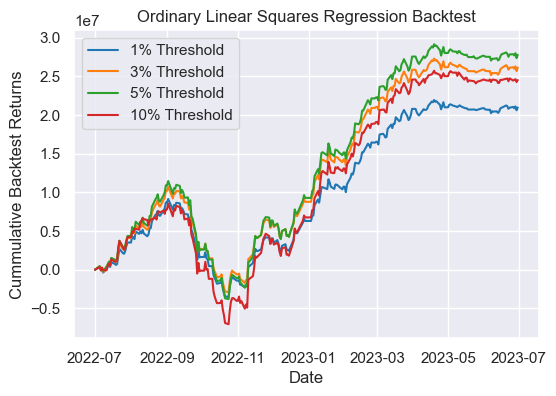

In [59]:
plt.figure(figsize = [6,4])
plt.plot(backtest_OLS_01, label = "1% Threshold", color = c10[0])
plt.plot(backtest_OLS_03, label = "3% Threshold", color = c10[1])
plt.plot(backtest_OLS_05, label = "5% Threshold", color = c10[2])
plt.plot(backtest_OLS_10, label = "10% Threshold", color = c10[3])
plt.title("Ordinary Linear Squares Regression Backtest")
plt.xlabel("Date")
plt.ylabel("Cummulative Backtest Returns")
plt.legend()
plt.show()

In [60]:
%%time 
backtest_ridge_01 = backtest(predictions_ridge, .01)
backtest_ridge_03 = backtest(predictions_ridge, .03)
backtest_ridge_05 = backtest(predictions_ridge, .05)
backtest_ridge_10 = backtest(predictions_ridge, .10)

CPU times: user 2min 36s, sys: 2.39 s, total: 2min 38s
Wall time: 2min 37s


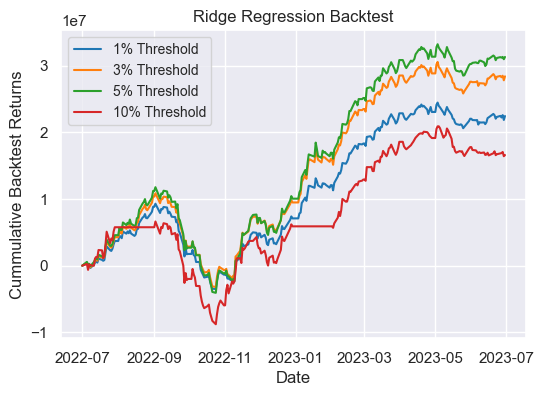

In [77]:
plt.figure(figsize = [6,4])
plt.plot(backtest_ridge_01, label = "1% Threshold", color = c10[0])
plt.plot(backtest_ridge_03, label = "3% Threshold", color = c10[1])
plt.plot(backtest_ridge_05, label = "5% Threshold", color = c10[2])
plt.plot(backtest_ridge_10, label = "10% Threshold", color = c10[3])
plt.title("Ridge Regression Backtest")
plt.xlabel("Date")
plt.ylabel("Cummulative Backtest Returns")
plt.legend(fontsize = 10)
plt.show()

In [62]:
%%time 
backtest_PV_01 = backtest(predictions_PV, .01)
backtest_PV_03 = backtest(predictions_PV, .03)
backtest_PV_05 = backtest(predictions_PV, .05)
backtest_PV_10 = backtest(predictions_PV, .10)

CPU times: user 2min 39s, sys: 1.2 s, total: 2min 40s
Wall time: 2min 40s


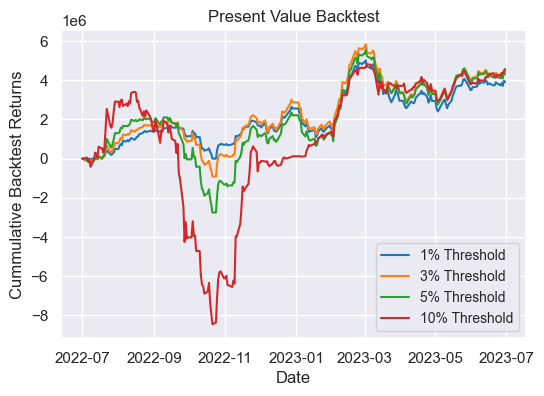

In [78]:
plt.figure(figsize = [6,4])
plt.plot(backtest_PV_01, label = "1% Threshold", color = c10[0])
plt.plot(backtest_PV_03, label = "3% Threshold", color = c10[1])
plt.plot(backtest_PV_05, label = "5% Threshold", color = c10[2])
plt.plot(backtest_PV_10, label = "10% Threshold", color = c10[3])
plt.title("Present Value Backtest")
plt.xlabel("Date")
plt.ylabel("Cummulative Backtest Returns")
plt.legend(fontsize = 10)
plt.show()

In [64]:
%%time 
backtest_rf_01 = backtest(predictions_rf, .01)
backtest_rf_03 = backtest(predictions_rf, .03)
backtest_rf_05 = backtest(predictions_rf, .05)
backtest_rf_10 = backtest(predictions_rf, .10)

CPU times: user 2min 35s, sys: 1.15 s, total: 2min 36s
Wall time: 2min 36s


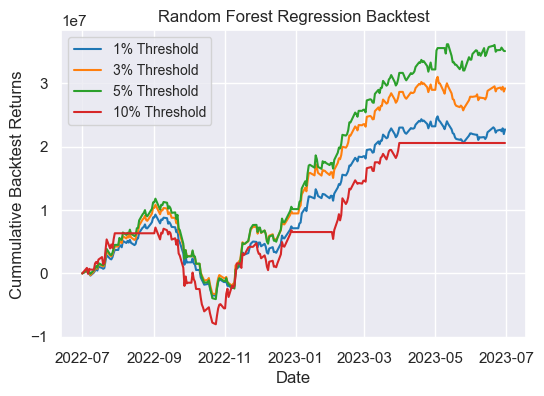

In [79]:
plt.figure(figsize = [6,4])
plt.plot(backtest_rf_01, label = "1% Threshold", color = c10[0])
plt.plot(backtest_rf_03, label = "3% Threshold", color = c10[1])
plt.plot(backtest_rf_05, label = "5% Threshold", color = c10[2])
plt.plot(backtest_rf_10, label = "10% Threshold", color = c10[3])
plt.title("Random Forest Regression Backtest")
plt.xlabel("Date")
plt.ylabel("Cummulative Backtest Returns")
plt.legend(fontsize = 10)
plt.show()

In [66]:
%%time 
backtest_gb_01 = backtest(predictions_gb, .01)
backtest_gb_03 = backtest(predictions_gb, .03)
backtest_gb_05 = backtest(predictions_gb, .05)
backtest_gb_10 = backtest(predictions_gb, .10)

CPU times: user 2min 36s, sys: 1.17 s, total: 2min 37s
Wall time: 2min 37s


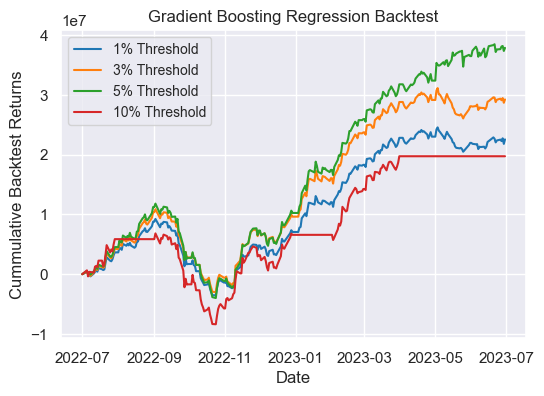

In [96]:
plt.figure(figsize = [6,4])
plt.plot(backtest_gb_01, label = "1% Threshold", color = c10[0])
plt.plot(backtest_gb_03, label = "3% Threshold", color = c10[1])
plt.plot(backtest_gb_05, label = "5% Threshold", color = c10[2])
plt.plot(backtest_gb_10, label = "10% Threshold", color = c10[3])
plt.title("Gradient Boosting Regression Backtest")
plt.xlabel("Date")
plt.ylabel("Cummulative Backtest Returns")
plt.legend(fontsize = 10)
plt.show()

In [69]:
backtest_log = binary_backtest(predictions_log)
backtest_clrf = binary_backtest(predictions_clrf)
backtest_gnb = binary_backtest(predictions_gnb)

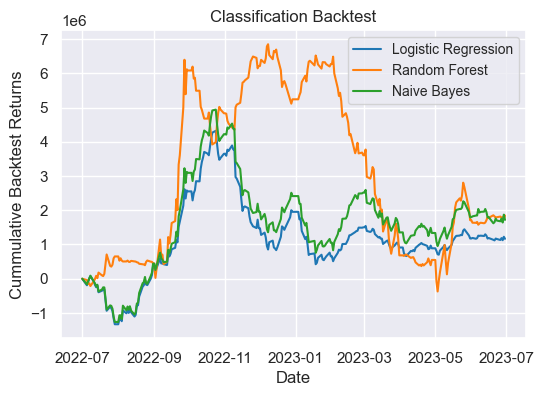

In [81]:
plt.figure(figsize = [6,4])
plt.plot(backtest_log, label = "Logistic Regression", color = c10[0])
plt.plot(backtest_clrf, label = "Random Forest", color = c10[1])
plt.plot(backtest_gnb, label = "Naive Bayes", color = c10[2])
plt.title("Classification Backtest")
plt.xlabel("Date")
plt.ylabel("Cummulative Backtest Returns")
plt.legend(fontsize = 10)
plt.show()

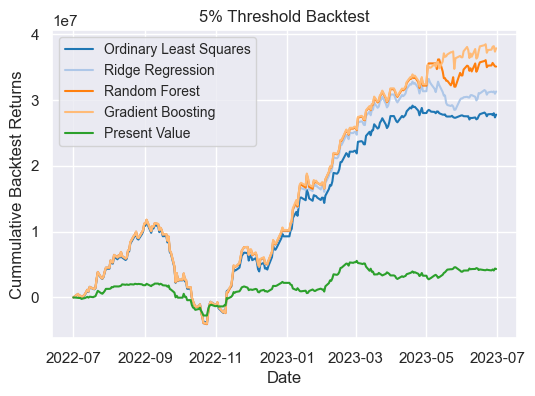

In [82]:
plt.figure(figsize = [6,4])
plt.plot(backtest_OLS_05, label = "Ordinary Least Squares", color = c20[0])
plt.plot(backtest_ridge_05, label = "Ridge Regression", color = c20[1])
plt.plot(backtest_rf_05, label = "Random Forest", color = c20[2])
plt.plot(backtest_gb_05, label = "Gradient Boosting", color = c20[3])
plt.plot(backtest_PV_05, label = "Present Value", color = c20[4])
plt.title("5% Threshold Backtest")
plt.xlabel("Date")
plt.ylabel("Cummulative Backtest Returns")
plt.legend(fontsize = 10)
plt.show()

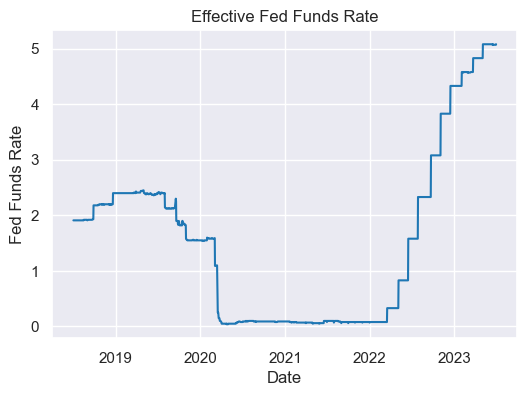

In [83]:
plt.figure(figsize = [6,4])
plt.plot(pd.read_pickle("macro_factors.pkl")[["EFFR"]])
plt.title("Effective Fed Funds Rate")
plt.xlabel("Date")
plt.ylabel("Fed Funds Rate")
plt.show()

## Baseline

In [87]:
actual_price = []
for col in list(df_monthly.index.droplevel(1).unique()):
    df1 = df_monthly.loc[col][["Price"]]  
    df1.columns =  pd.MultiIndex.from_tuples([(col, "Actual")], names=['cusip', 'type'])
    actual_price.append(df1)

In [88]:
actual_price = pd.concat(actual_price, axis = 1)
actual_price = actual_price.loc[pd.Timestamp("2022-07-01"):]
actual_price.index.name = "trd_dt"
actual_price.head()

cusip      00206RBH4 00206RBK7 00206RCP5 00206RCQ3 00206RCU4 00206RDJ8  \
type          Actual    Actual    Actual    Actual    Actual    Actual   
trd_dt                                                                   
2022-07-01  87.70000    88.095    95.767  94.04200   107.156    89.848   
2022-08-01  92.89600    92.714   100.142  98.86800   111.815    95.676   
2022-09-01  84.73800    85.380    92.751  90.94300   102.107    86.045   
2022-10-03  80.98000    80.452    88.498  85.54171    95.491    82.074   
2022-11-01  78.03035    76.931    86.375  82.13700    92.601    78.172   

cusip      00206RDK5 00206RDQ2  00206RDR0 002824BF6 002824BG4 002824BH2  \
type          Actual    Actual     Actual    Actual    Actual    Actual   
trd_dt                                                                    
2022-07-01  90.47100   100.408  103.89900   101.026   107.394   105.688   
2022-08-01  95.33614   102.275  107.44246   102.866   113.439   112.464   
2022-09-01  89.26500    98.594  101.19930   100.000   104.126   103.959   
2022-10-03  80.41700    97.192   95.40300    97.690    99.898    97.877   
2022-11-01  77.56000    95.452   94.67946    96.680    96.196    94.484   

cusip      00287YAM1 00287YAR0  00287YAS8 00287YAV1 00287YAW9 00440EAW7  \
type          Actual    Actual     Actual    Actual    Actual    Actual   
trd_dt                                                                    
2022-07-01    91.900    98.069   94.95500    95.103    91.353    94.630   
2022-08-01    96.736   102.534  101.25578   100.165    96.784   100.174   
2022-09-01    88.676    94.217   93.55100    91.671    87.880    92.666   
2022-10-03    84.173    91.055   86.22400    88.502    85.168    87.262   
2022-11-01    83.075    88.995   84.52600    86.709    82.041    82.207   

cusip      00774MAB1 00817YAF5 00817YAZ1 013716AU9 02209SAM5  02209SAR4  \
type          Actual    Actual    Actual    Actual    Actual     Actual   
trd_dt                                                                    
2022-07-01    90.570   113.052    82.915   115.546    73.378  85.289592   
2022-08-01    92.529   115.929    86.599   119.212    77.843  91.574000   
2022-09-01    90.531   109.196    80.261   111.644    74.429  87.427000   
2022-10-03    88.231   103.882    75.521   107.628    69.698  83.756000   
2022-11-01    87.242   102.069    73.214   104.454    68.256  82.589000   

cusip      02209SAV5 023135AP1 023135AQ9 023135BC9 023135BF2 023135BJ4  \
type          Actual    Actual    Actual    Actual    Actual    Actual   
trd_dt                                                                   
2022-07-01    68.020   106.960   105.436    98.100    95.606    94.951   
2022-08-01    72.269   111.951   112.616   100.239   101.154   100.246   
2022-09-01    68.258   104.427   105.016    96.448    92.863    91.680   
2022-10-03    65.251   100.871    98.576    94.190    89.389    86.921   
2022-11-01    62.366    98.115    95.059    92.914    85.267    82.624   

cusip      023135BM7 025816BF5 026874DF1 026874DL8 03027XAK6 03027XAP5  \
type          Actual    Actual    Actual    Actual    Actual    Actual   
trd_dt                                                                   
2022-07-01    94.694  91.12900    93.940    94.508    95.428    96.023   
2022-08-01   101.880  96.32500    97.543   100.125    97.082    96.942   
2022-09-01    91.601  89.86700    90.738    92.725    94.255    94.032   
2022-10-03    85.672  84.73752    87.831    87.469    92.298    91.482   
2022-11-01    81.833  80.08400    83.874    83.697    90.706    89.652   

cusip       03040WAD7 03040WAR6 03073EAP0  031162BZ2 031162CD0  031162CF5  \
type           Actual    Actual    Actual     Actual    Actual     Actual   
trd_dt                                                                      
2022-07-01  116.62300    83.777    96.372  90.417000    93.044   94.43300   
2022-08-01  121.72200    88.130    98.819  98.146000    98.646  101.88200   
2022-09-01  112.38500    82.188  

In [182]:
def trading_signals_baseline(predictions, long = True):

    df1 = predictions.stack("cusip")

    if long == True:
        df1["Signal"] = 1
    else:
        df1["Signal"] = -1
    df1["Month Start"] = 1

    trading_period = {pd.Timestamp("2022-07-01"): 1, pd.Timestamp("2022-08-01"): 2,
                      pd.Timestamp("2022-09-01"): 3, pd.Timestamp("2022-10-03"): 4,
                      pd.Timestamp("2022-11-01"): 5, pd.Timestamp("2022-12-01"): 6,
                      pd.Timestamp("2023-01-03"): 7, pd.Timestamp("2023-02-01"): 8,
                      pd.Timestamp("2023-03-01"): 9, pd.Timestamp("2023-04-03"): 10,
                      pd.Timestamp("2023-05-01"): 11, pd.Timestamp("2023-06-01"): 12}
    
    df1["Trading Period"] = df1.index.get_level_values('trd_dt').map(trading_period)
    return df1

In [184]:
def baseline_backtest(prices, long = True, initial_capital = 100_000_000):

    signals = trading_signals_baseline(prices, long)

    period = signals["Trading Period"].unique()
    trades = signals.groupby("trd_dt").agg(lambda x: sum(abs(x)))["Signal"]
    
    for i in period:
        if i == 1:
            cummulative_profits = []
            for j in prices.columns.droplevel(1).unique():
                cummulative_profits.append(single_month_cusip(i, initial_capital/trades.iloc[i - 1], j, signals))
            df1 = pd.concat(cummulative_profits, axis = 1)
            profits = df1.sum(axis = 1)
            ending_capital = profits[-1]
        else:
            cummulative_profits = []
            for j in prices.columns.droplevel(1).unique():
                cummulative_profits.append(single_month_cusip(i, (initial_capital + ending_capital)/trades.iloc[i - 1], j, signals))
            df1 = pd.concat(cummulative_profits, axis = 1)
            profits = pd.concat([profits, df1.sum(axis = 1) + ending_capital])
            ending_capital = profits[-1]
        
    return profits

In [185]:
backtest_baseline_short = baseline_backtest(actual_price, long = False)

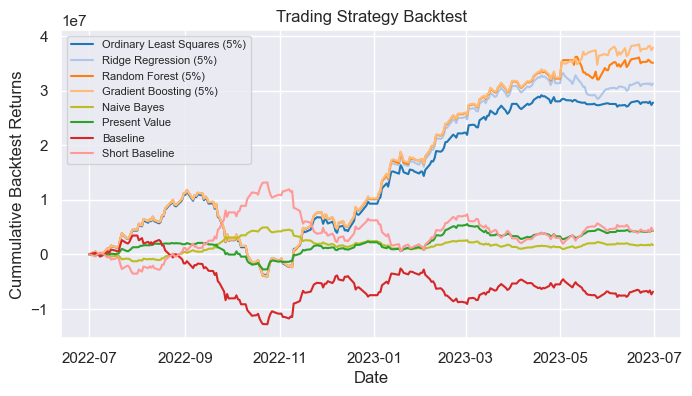

In [186]:
plt.figure(figsize = [8,4])
plt.plot(backtest_OLS_05, label = "Ordinary Least Squares (5%)", color = c20[0])
plt.plot(backtest_ridge_05, label = "Ridge Regression (5%)", color = c20[1])
plt.plot(backtest_rf_05, label = "Random Forest (5%)", color = c20[2])
plt.plot(backtest_gb_05, label = "Gradient Boosting (5%)", color = c20[3])
plt.plot(backtest_gnb, label = "Naive Bayes", color = c10[8])
plt.plot(backtest_PV_05, label = "Present Value", color = c20[4])
plt.plot(backtest_baseline, label = "Baseline", color = c20[6])
plt.plot(backtest_baseline_short, label = "Short Baseline", color = c20[7])
plt.title("Trading Strategy Backtest")
plt.xlabel("Date")
plt.ylabel("Cummulative Backtest Returns")
plt.legend(fontsize = 8)
plt.show()

In [187]:
strategies = pd.DataFrame({"Baseline": backtest_baseline,
                           "Naive Bayes": backtest_gnb,
                           "Present Value": backtest_PV_05,
                           "Short Baseline": backtest_baseline_short,
                           "OLS Regression": backtest_OLS_05,
                           "Ridge Regression": backtest_ridge_05,
                           "Random Forest": backtest_rf_05,
                           "Gradient Boosting": backtest_gb_05})
strategies.head()

Baseline    Naive Bayes  Present Value  Short Baseline  \
trd_dt                                                                    
2022-07-01       0.000000       0.000000       0.000000        0.000000   
2022-07-05  292718.646345 -164834.729577  -73789.069374  -365682.949750   
2022-07-06  -42314.443231  -77890.704123  -82896.431127   -30409.055886   
2022-07-07 -131732.284575    8962.621977  -86247.936539    59075.510780   
2022-07-08 -417285.869281   88754.812784 -215489.897378   344837.254344   

            OLS Regression  Ridge Regression  Random Forest  Gradient Boosting  
trd_dt                                                                          
2022-07-01        0.000000          0.000000       0.000000           0.000000  
2022-07-05   473554.795866     565582.960036  510859.378897      537605.574095  
2022-07-06   151981.586616     165976.412850  159273.158300      205455.854616  
2022-07-07   154703.554746     262188.856230  270541.069583      266044.872003  
2022-07-08  -181624.594818     -80449.219008  -67807.067216      -77204.142492

In [188]:
strategies_daily = strategies.diff().dropna()   
strategies_daily.head()

Baseline    Naive Bayes  Present Value  Short Baseline  \
trd_dt                                                                    
2022-07-05  292718.646345 -164834.729577  -73789.069374  -365682.949750   
2022-07-06 -335033.089576   86944.025454   -9107.361753   335273.893864   
2022-07-07  -89417.841344   86853.326100   -3351.505412    89484.566666   
2022-07-08 -285553.584706   79792.190807 -129241.960839   285761.743564   
2022-07-11  460222.192938 -170211.438814  124001.618680  -460555.553635   

            OLS Regression  Ridge Regression  Random Forest  Gradient Boosting  
trd_dt                                                                          
2022-07-05   473554.795866     565582.960036  510859.378897      537605.574095  
2022-07-06  -321573.209250    -399606.547186 -351586.220597     -332149.719479  
2022-07-07     2721.968130      96212.443380  111267.911283       60589.017387  
2022-07-08  -336328.149564    -342638.075238 -338348.136799     -343249.014495  
2022-07-11   602423.985157     616933.354014  576893.368435      582922.590408

In [189]:
average_daily_return = (strategies + 100_000_000).pct_change().dropna().mean()
average_daily_return

Baseline            -0.000268
Naive Bayes          0.000070
Present Value        0.000173
Short Baseline       0.000187
OLS Regression       0.001006
Ridge Regression     0.001119
Random Forest        0.001235
Gradient Boosting    0.001317
dtype: float64

In [194]:
average_daily_return * 252

Prediction Model
Baseline            -0.067592
Naive Bayes          0.017700
Present Value        0.043628
Short Baseline       0.047153
OLS Regression       0.253468
Ridge Regression     0.281874
Random Forest        0.311179
Gradient Boosting    0.331853
dtype: float64

In [190]:
daily_std = (strategies + 100_000_000).pct_change().dropna().std()
daily_std

Baseline             0.005723
Naive Bayes          0.001890
Present Value        0.002543
Short Baseline       0.005696
OLS Regression       0.006445
Ridge Regression     0.007006
Random Forest        0.007275
Gradient Boosting    0.007278
dtype: float64

In [199]:
results = pd.DataFrame({"Profit": strategies.iloc[-1].map(lambda x: f'-${"{:,.2f}".format(abs(x))}' if x < 0 else f'${"{:,.2f}".format(x)}'),
                        "Annual Return": (strategies.iloc[-1]/100_000_000).map(lambda x: f'{"{:.2%}".format(x)}'),
                        "Annual Std": (daily_std * np.sqrt(252)).map(lambda x: f'{"{:.2%}".format(x)}'),
                        "Annual Sharpe": ((strategies.iloc[-1]/100_000_000)/(daily_std * np.sqrt(252))).map(lambda x: f'{"{:.2}".format(x)}'),
                        "T-Stat": ((strategies.iloc[-1]/100_000_000)/((daily_std * np.sqrt(252))/ np.sqrt(len(average_daily_return)))).map(lambda x: f'{"{:.2}".format(x)}'),
                        "Max Loss": strategies_daily.min().map(lambda x: f'-${"{:,.2f}".format(abs(x))}' if x < 0 else f'${"{:,.2f}".format(x)}'),
                        "Win Rate": ((strategies_daily > 0).sum()/len(strategies_daily)).map(lambda x: f'{"{:.2%}".format(x)}')
})
results.index.name = "Prediction Model"
results

Profit Annual Return Annual Std Annual Sharpe  \
Prediction Model                                                           
Baseline           -$6,840,362.99        -6.84%      9.09%         -0.75   
Naive Bayes         $1,719,178.31         1.72%      3.00%          0.57   
Present Value       $4,321,173.87         4.32%      4.04%           1.1   
Short Baseline      $4,347,844.69         4.35%      9.04%          0.48   
OLS Regression     $27,786,165.60        27.79%     10.23%           2.7   
Ridge Regression   $31,297,400.07        31.30%     11.12%           2.8   
Random Forest      $35,086,217.27        35.09%     11.55%           3.0   
Gradient Boosting  $37,869,570.64        37.87%     11.55%           3.3   

                  T-Stat        Max Loss Win Rate  
Prediction Model                                   
Baseline            -2.1  -$1,599,513.31   46.18%  
Naive Bayes          1.6    -$963,121.71   51.41%  
Present Value        3.0    -$742,950.11   50.60%  
Short Baseline       1.4  -$3,103,375.18   49.40%  
OLS Regression       7.7  -$2,325,594.47   51.41%  
Ridge Regression     8.0  -$2,391,311.25   51.81%  
Random Forest        8.6  -$2,382,476.97   51.41%  
Gradient Boosting    9.3  -$2,649,912.05   56.22%